In [22]:
import pandas as pd
import numpy as np
train=pd.read_csv('MERCtrain.csv')
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [23]:
train.shape

(4209, 378)

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [25]:
y_train=train['y'].values
y_train

array([130.81,  88.53,  76.26, ..., 109.22,  87.48, 110.85])

In [26]:
column_x=[c for c in train.columns if 'X' in c]
print(len(column_x))
print(train[column_x].dtypes.value_counts())

376
int64     368
object      8
dtype: int64


In [27]:
test=pd.read_csv('MERCtest.csv')
test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [28]:
test.size

1586793

In [29]:
test.shape

(4209, 377)

In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, ID to X385
dtypes: int64(369), object(8)
memory usage: 12.1+ MB


In [31]:
final_column=list(set(train.columns)-set(['ID','y']))
x_train=train[final_column]
x_test=test[final_column]

In [32]:
def detect(df):
    if df.isnull().any().any():
        print('Yes')
    else:
        print('No')
detect(x_train)
detect(x_test)
        

No
No


In [38]:
unique_value_dict={}
for col in x_train.columns:
    if col not in ['ID','y','X0','X1','X2','X3','X4','X5','X6','X8',]:
        unique_value=str(np.sort(x_train[col].unique()).tolist())
        t_list=unique_value_dict.get(unique_value,[])
        t_list.append(col)
        unique_value_dict[unique_value]=t_list[:]
for unique_val,columns in unique_value_dict.items():
    print("Columns containing the unique value is :",unique_val)
    print(columns)
    print("====================")
    
print("Bye")

Columns containing the unique value is : [0, 1]
['X164', 'X225', 'X296', 'X288', 'X128', 'X176', 'X98', 'X88', 'X32', 'X33', 'X222', 'X169', 'X306', 'X67', 'X78', 'X104', 'X68', 'X338', 'X194', 'X220', 'X212', 'X336', 'X174', 'X145', 'X12', 'X217', 'X18', 'X115', 'X27', 'X58', 'X23', 'X200', 'X71', 'X63', 'X177', 'X252', 'X265', 'X301', 'X74', 'X382', 'X199', 'X349', 'X24', 'X137', 'X283', 'X231', 'X260', 'X97', 'X298', 'X263', 'X365', 'X10', 'X316', 'X26', 'X21', 'X142', 'X100', 'X181', 'X239', 'X108', 'X359', 'X246', 'X153', 'X321', 'X358', 'X334', 'X29', 'X221', 'X48', 'X66', 'X53', 'X312', 'X279', 'X351', 'X81', 'X343', 'X49', 'X380', 'X138', 'X61', 'X99', 'X264', 'X101', 'X91', 'X19', 'X249', 'X125', 'X118', 'X285', 'X356', 'X47', 'X167', 'X105', 'X112', 'X341', 'X123', 'X41', 'X258', 'X335', 'X15', 'X255', 'X372', 'X326', 'X152', 'X210', 'X256', 'X75', 'X259', 'X204', 'X230', 'X40', 'X254', 'X185', 'X175', 'X157', 'X87', 'X35', 'X314', 'X302', 'X69', 'X385', 'X117', 'X120', 'X362

In [39]:
# Removal of columns with variancd 0
for column in final_column:
    check=len(np.unique(x_train[column]))
    if check==1:
        x_train.drop(column,axis=1,inplace =True)
        x_test.drop(column,axis=1,inplace=True)
x_train.head()

c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,X164,X225,X296,X288,X128,X176,X98,X88,X32,X33,...,X165,X70,X304,X186,X227,X132,X273,X172,X130,X324
0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
1,0,0,0,0,1,0,1,0,0,0,...,1,1,1,0,0,1,1,0,0,0
2,0,0,0,0,1,0,1,0,0,0,...,0,1,1,0,0,1,1,0,0,1
3,0,0,0,0,1,0,1,0,0,0,...,0,1,1,0,0,1,1,0,0,0
4,0,0,0,0,1,0,1,0,0,0,...,0,1,1,0,0,1,1,0,0,0


In [40]:
# Label encoding for Categorical columns 
from sklearn import preprocessing 
for f in ['X0','X1','X2','X3','X4','X5','X6','X8']:
    lbl=preprocessing.LabelEncoder()
    lbl.fit(list(x_train[f].values))
    x_train[f]=lbl.transform(list(x_train[f].values))

c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [41]:
x_train.head()

,X164,X225,X296,X288,X128,X176,X98,X88,X32,X33,...,X165,X70,X304,X186,X227,X132,X273,X172,X130,X324
0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
1,0,0,0,0,1,0,1,0,0,0,...,1,1,1,0,0,1,1,0,0,0
2,0,0,0,0,1,0,1,0,0,0,...,0,1,1,0,0,1,1,0,0,1
3,0,0,0,0,1,0,1,0,0,0,...,0,1,1,0,0,1,1,0,0,0
4,0,0,0,0,1,0,1,0,0,0,...,0,1,1,0,0,1,1,0,0,0


NameError: name 'imprtances' is not defined

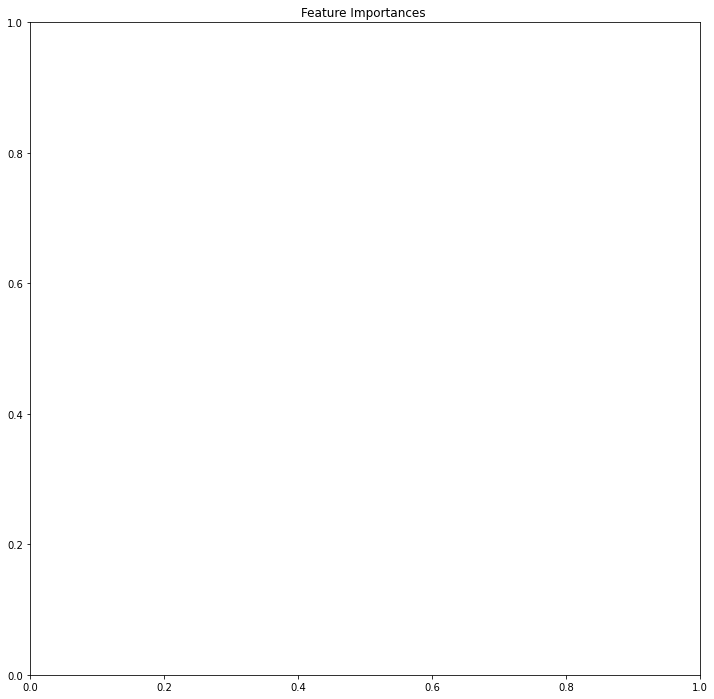

In [45]:
from sklearn import ensemble
model=ensemble.RandomForestRegressor(n_estimators=200,max_depth=10,min_samples_leaf=4,max_features=0.2,n_jobs=1,random_state=0)
model.fit(x_train,y_train)
feat_names=x_train.columns.values

importances=model.feature_importances_
std=np.std([tree.feature_importances_ for tree in model.estimators_],axis=0)
indices=np.argsort(importances)[::-1][:20]


import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.title("Feature Importances ")
plt.bar(range(len(indices)),imprtances[indices],color='r',align='center')
plt.xtickes(range(len(indices)),feat_names[indices],rotation='vertical')
plt.xlim([-1,len(indices)])
plt.show()